In [1]:
import yfinance as yf
import pandas as pd
from pandas import DataFrame
import time
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = yf.download("AMD INTC INFY MSFT MU" ,start="2009-01-01" ,end="2019-01-01")
data.fillna(method='bfill' ,inplace=True)

[*********************100%***********************]  5 of 5 downloaded


In [3]:
data.head()

Adj Close                           Close                      \
                 AMD  INFY   INTC   MSFT    MU   AMD  INFY   INTC   MSFT   
Date                                                                       
2008-12-31      2.16  2.22  10.46  15.00  2.64  2.16  3.07  14.66  19.44   
2009-01-02      2.38  2.28  10.85  15.69  2.84  2.38  3.14  15.20  20.33   
2009-01-05      2.67  2.35  10.64  15.83  3.32  2.67  3.25  14.91  20.52   
2009-01-06      2.78  2.41  10.97  16.02  3.47  2.78  3.33  15.37  20.76   
2009-01-07      2.66  2.44  10.31  15.06  3.28  2.66  3.37  14.44  19.51   

                  ...  Open                              Volume            \
              MU  ...   AMD  INFY   INTC   MSFT    MU       AMD      INFY   
Date              ...                                                       
2008-12-31  2.64  ...  2.20  3.06  14.71  19.31  2.44  10226500   7721600   
2009-01-02  2.84  ...  2.19  3.06  14.69  19.53  2.65  13832100  14917600   
2009-01-05  3.32  ...  2.37  3.10  15.07  20.20  2.94  19326900  20835200   
2009-01-06  3.47  ...  2.75  3.25  15.09  20.75  3.40  23860000  30572000   
2009-01-07  3.28  ...  2.72  3.17  14.79  20.19  3.48  14026300  51324800   

                                           
                 INTC      MSFT        MU  
Date                                       
2008-12-31   34063800  46419000  11978200  
2009-01-02   52208200  50084000  17537200  
2009-01-05   57320400  61475200  36158500  
2009-01-06   61631400  58083400  30659700  
2009-01-07  131389200  72709900  25676100  

[5 rows x 30 columns]

In [4]:
pylab.rcParams['figure.figsize'] = (15 , 9)

# Plot historical price from 2009 to 2019

Use Adj Close as historical price

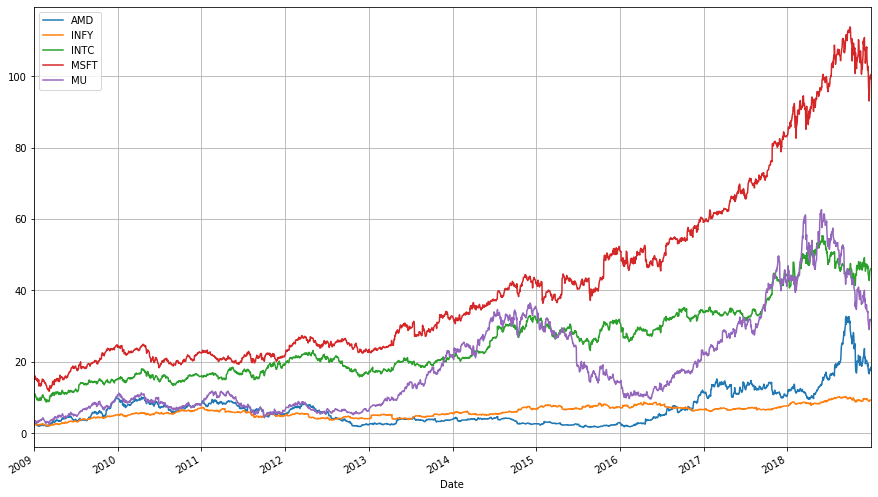

In [5]:
historical_price = data["Adj Close"]
historical_price.plot(grid = True)

# Plot simple daily returns from 2009 to 2019

To calculate simple return use formula:  r[ t ] = ( p[ t ] - p[ t-1 ] ) / p[ t-1 ]

    r = simple return from time t-1 to time t
    p = price of an asset at time t
    t = time

In [6]:
P = data["Adj Close"]
price = P.reset_index().values.tolist() #Convert dataframe and it's index to list 

In [7]:
simple_returns = list()
simple_returns_each_day = []
for t in range(len(price)):
    if t==0:
        continue #pass 2008-12-31
    simple_returns_each_day = [] 
    simple_returns_each_day.append(price[t][0])
    
    for num_stock in range(1,6):
        r = (price[t][num_stock] - price[t-1][num_stock])/price[t-1][num_stock] 
        simple_returns_each_day.append(r)
        
    simple_returns.append( simple_returns_each_day )

In [8]:
simple_returns = pd.DataFrame(simple_returns ,columns=['Date','AMD', 'INTC' ,'INFY' ,'MSFT' ,'MU']) #Convert list to dataframe
simple_returns.set_index('Date',inplace=True)

In [9]:
simple_returns

,AMD,INTC,INFY,MSFT,MU
Date,,,,,
2009-01-02,0.101852,0.027027,0.037285,0.046000,0.075758
2009-01-05,0.121849,0.030702,-0.019355,0.008923,0.169014
2009-01-06,0.041199,0.025532,0.031015,0.012003,0.045181
2009-01-07,-0.043165,0.012448,-0.060164,-0.059925,-0.054755
2009-01-08,0.030075,-0.012295,0.006790,0.031208,0.039634
...,...,...,...,...,...
2018-12-24,-0.016539,-0.002240,-0.027961,-0.041800,-0.042876
2018-12-26,0.075075,0.032548,0.059635,0.068336,0.064438
2018-12-27,-0.022905,0.007609,0.003752,0.006236,0.033668


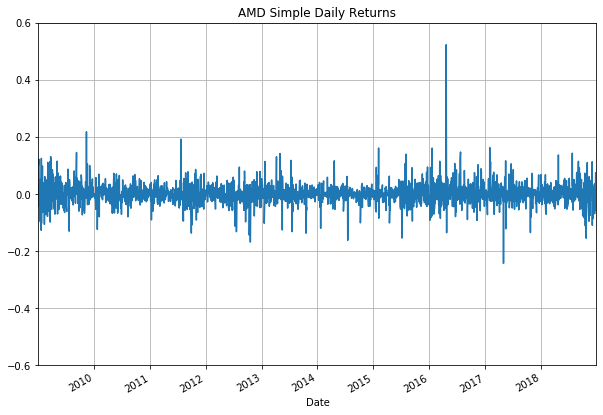

In [10]:
pylab.rcParams['figure.figsize'] = (10 ,7)
simple_returns['AMD'].plot(grid = True ,ylim=(-0.6,0.6) ,title="AMD Simple Daily Returns")

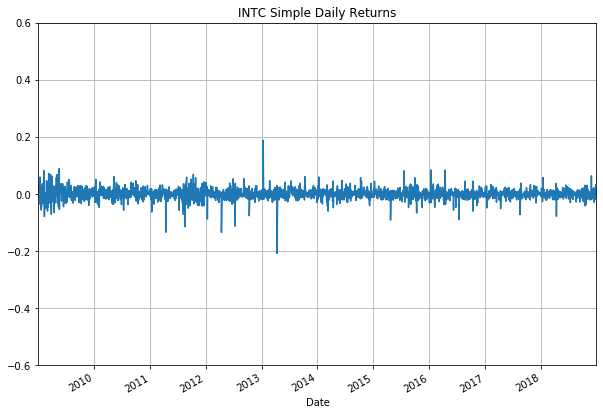

In [11]:
simple_returns['INTC'].plot(grid = True ,ylim=(-0.6,0.6) ,title="INTC Simple Daily Returns")

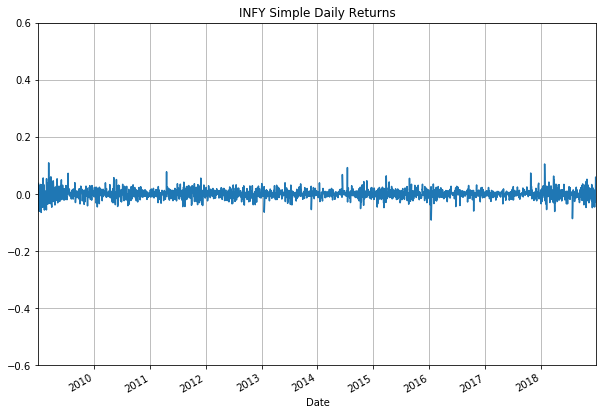

In [12]:
simple_returns['INFY'].plot(grid = True ,ylim=(-0.6,0.6) ,title="INFY Simple Daily Returns")

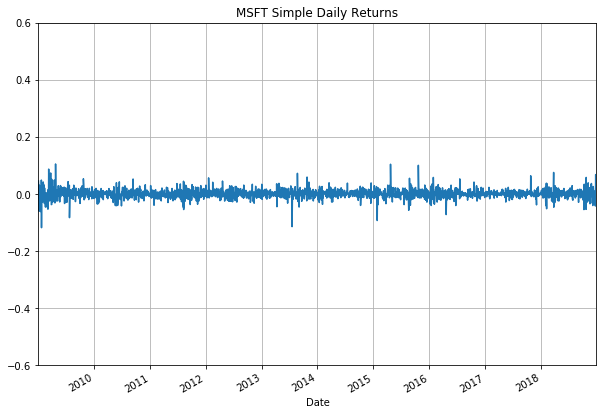

In [13]:
simple_returns['MSFT'].plot(grid = True ,ylim=(-0.6,0.6) ,title="MSFT Simple Daily Returns")

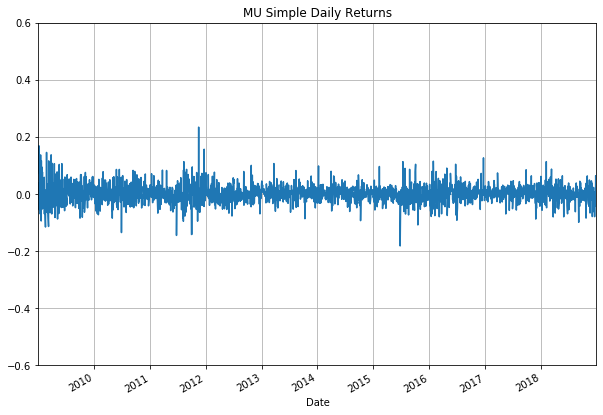

In [14]:
simple_returns['MU'].plot(grid = True ,ylim=(-0.6,0.6) ,title="MU Simple Daily Returns")

# Plot log daily returns from 2009 to 2019

To Calculate log return use fomular: r = ln ( P[ t ] / P [ t-1 ] ) = ln(P[ t ]) - ln(P[ t-1 ])

    r = simple return from time t-1 to time t
    p = price of an asset at time t
    t = time

In [15]:
# P = data["Adj Close"]
# price = P.reset_index().values.tolist() 
log_returns = list()
log_returns_each_day = []
for t in range(len(price)):
    if t==0:
        continue #pass 2008-12-31
        
    log_returns_each_day = []
    log_returns_each_day.append(price[t][0])
    
    for num_stock in range(1,6):
        r = np.log(price[t][num_stock]) - np.log(price[t-1][num_stock])
        log_returns_each_day.append(r)
        
    log_returns.append(log_returns_each_day)

In [16]:
log_returns = pd.DataFrame(log_returns ,columns=['Date','AMD', 'INTC' ,'INFY' ,'MSFT' ,'MU']) #Convert list to dataframe
log_returns.set_index('Date',inplace=True)

In [17]:
log_returns

,AMD,INTC,INFY,MSFT,MU
Date,,,,,
2009-01-02,0.096992,0.026668,0.036607,0.044973,0.073025
2009-01-05,0.114978,0.030240,-0.019545,0.008883,0.156161
2009-01-06,0.040372,0.025211,0.030544,0.011931,0.044190
2009-01-07,-0.044125,0.012371,-0.062050,-0.061796,-0.056311
2009-01-08,0.029632,-0.012371,0.006767,0.030731,0.038869
...,...,...,...,...,...
2018-12-24,-0.016677,-0.002242,-0.028359,-0.042698,-0.043822
2018-12-26,0.072390,0.032029,0.057925,0.066102,0.062447
2018-12-27,-0.023171,0.007580,0.003745,0.006216,0.033113


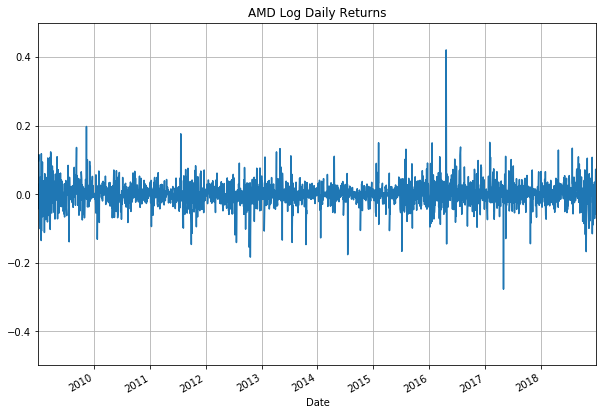

In [18]:
log_returns['AMD'].plot(grid = True ,ylim=(-0.5,0.5) ,title="AMD Log Daily Returns")

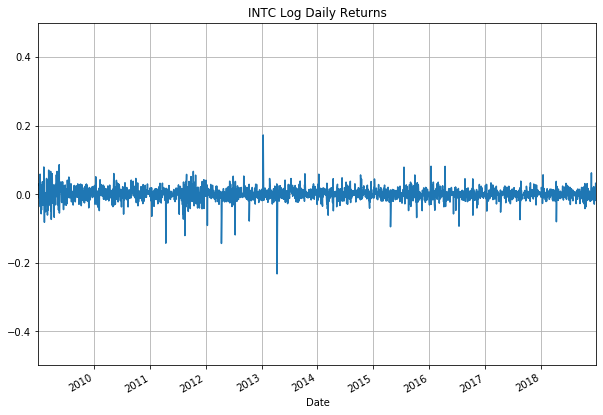

In [19]:
log_returns['INTC'].plot(grid = True ,ylim=(-0.5,0.5) ,title="INTC Log Daily Returns")

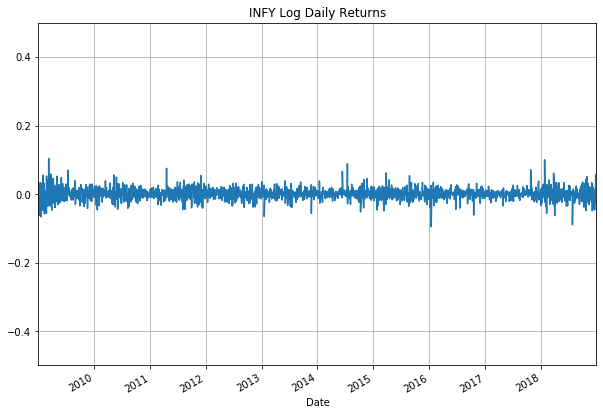

In [20]:
log_returns['INFY'].plot(grid = True ,ylim=(-0.5,0.5) ,title="INFY Log Daily Returns")

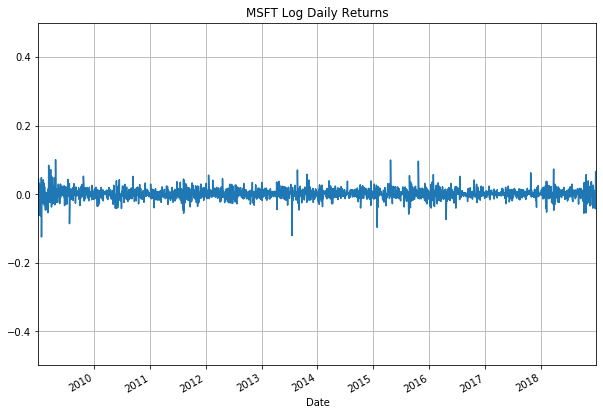

In [21]:
log_returns['MSFT'].plot(grid = True ,ylim=(-0.5,0.5) ,title="MSFT Log Daily Returns")

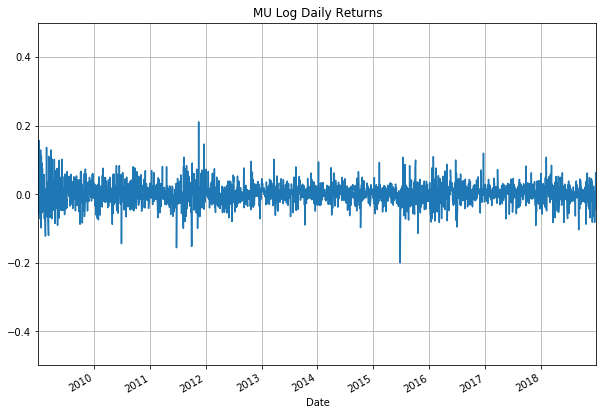

In [22]:
log_returns['MU'].plot(grid = True ,ylim=(-0.5,0.5) ,title="MU Log Daily Returns")

# Annualized Return (Average Return)

    1. Count days in each year.
    2. Calculate the annualized return for each year.
    3. Plot the annualized return for each year.
    
To calculate annualized returns use formula: Annualized Return = ((1 + R1) * (1 + R2) * (1 + R3) * ... * (1 + Rn))^(365/n)  - 1

    R = simple daily returns
    n = # days per year

In [184]:
#Set up parameters
date = simple_returns.reset_index()["Date"].dt 
year = date.year.values.tolist()
R = simple_returns.reset_index().values.tolist()
annualize = [] #To collect aunualized returns
days_per_year = [] #To check the number of days in each year
current_year = 2009
days = 0
r_each = [1,1,1,1,1]
annualize_each_year = []

In [185]:
for t in range(len(year)):
    if year[t] == current_year:
        for num_stock in range(1,6):
            r = r_each[num_stock-1] * (1 + R[t][num_stock]) #Calculates annualized returns
            r_each[num_stock-1] = r
        days = days + 1
    else: 
        annualize_each_year.append(current_year)
        for num_stock in range(1,6):
            r_each[num_stock-1] = np.power(  r_each[num_stock-1] ,(365/days)) - 1 #Calculates annualized returns
            annualize_each_year.append( r_each[num_stock-1] )
        days_per_year.append( [current_year, days] )  
        annualize.append(annualize_each_year)
        days = 0 #resets days
        current_year = current_year+1 #update current year    
        r_each = [1,1,1,1,1] #reset r_each
        annualize_each_year = [] #reset annualize_each_year

annualize_each_year.append(current_year)
for num_stock in range(1,6):
    r_each[num_stock-1] = np.power(  r_each[num_stock-1] ,(365/days)) - 1 #Calculates annualized returns
    annualize_each_year.append( r_each[num_stock-1] )
days_per_year.append( [current_year, days] ) 
annualize.append(annualize_each_year)

In [186]:
print(days_per_year)

[[2009, 252], [2010, 251], [2011, 251], [2012, 249], [2013, 251], [2014, 251], [2015, 251], [2016, 251], [2017, 250], [2018, 250]]


In [187]:
annualize = pd.DataFrame(annualize ,columns=['Year','AMD', 'INTC' ,'INFY' ,'MSFT' ,'MU']) #Convert list to dataframe

In [188]:
annualize.set_index('Year',inplace=True)
annualize

,AMD,INTC,INFY,MSFT,MU
Year,,,,,
2009,7.780663,2.307352,0.695407,0.983727,6.447857
2010,-0.219517,0.576066,0.056157,-0.113318,-0.355637
2011,-0.480336,-0.439885,0.310378,-0.068221,-0.329498
2012,-0.701883,-0.267995,-0.185156,0.037930,-0.089741
2013,0.855361,0.539496,0.403918,0.622952,4.627035
2014,-0.434199,0.355415,0.719946,0.438743,1.010232
2015,0.110756,0.112770,-0.034565,0.333560,-0.728964
2016,6.765224,-0.094667,0.152037,0.248764,0.855385
2017,-0.143431,0.247651,0.461534,0.629776,1.403940


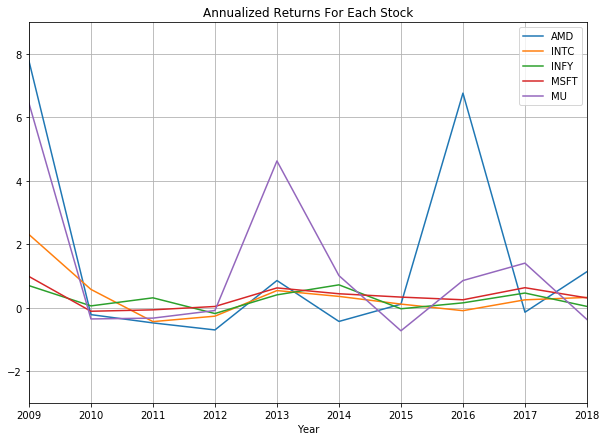

In [189]:
annualize.plot(grid = True ,ylim=(-3,9) ,title="Annualized Returns For Each Stock")